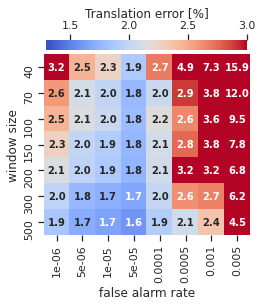

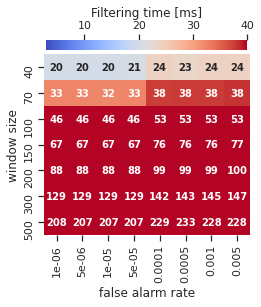

In [1]:
from IPython import get_ipython;   
get_ipython().magic('reset -sf')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
import matplotlib.ticker as ticker


################### CA-CFAR ########################

sns.set_theme(style="ticks", color_codes=True)
sns.set(style="ticks")
pal=sns.color_palette("coolwarm", as_cmap=True)
sns.set_palette("coolwarm")

### LOAD AND SORT NAMES OF COLUMNS
df_cfar = pd.read_csv('./data/CA-CFAR_merged.csv', sep=r',', header=0)
#df_cfar.rename(columns={"time-Filtering avg": "Filtering time [ms]"})
df_cfar=df_cfar.rename({'time-Filtering avg': 'Filtering time [ms]'}, axis=1) 

df_cfar['False alarm rate'] = df_cfar.apply (lambda row: format(row["false alarm rate"],'.2E'), axis=1)
df_cfar=df_cfar[df_cfar["false alarm rate"]<0.01]
df_cfar.sort_values(by=["window size", "false alarm rate"])
result1 = df_cfar.pivot_table(index="window size", 
                        columns="false alarm rate", 
                        values='Trans.err.(%)')
annot_kws=annot_kws={"size": 10,"weight": "bold"}
cbar_kws=cbar_kws={}
pad_distance=0.02
plt.figure(1)
sns_plot = sns.heatmap(result1,square=True,vmin=1.3, vmax=3.0, cmap="coolwarm",annot=True, fmt="0.1f",cbar_kws={'label': 'Translation error [%]', "location": "top", "use_gridspec" : False, "pad":pad_distance,"shrink": 0.6},annot_kws=annot_kws, robust=True)
#plt.title('Filter quality evaluated by odometry performance')
fig=sns_plot.get_figure()
fig.savefig('./output/CA-CFAR_parameter_sensitivity.pdf', format='pdf',bbox_inches='tight')
fig.savefig('./output/CA-CFAR_parameter_sensitivity.png', format='png', dpi=1000,bbox_inches='tight')



plt.figure(2)
result2 = df_cfar.pivot_table(index='window size', columns='false alarm rate', values='Filtering time [ms]')

#C_vals = np.logspace(4, 1, 7)
#g_vals = np.logspace(-6, 2, 9)

#tick = ticker.ScalarFormatter(useOffset=False, useMathText=True)
#tick.set_powerlimits((0,0))
#tc = [u"${}$".format(tick.format_data(x)) for x in C_vals]
#tg = [u"${}$".format(tick.format_data(x)) for x in g_vals]

sns_plot_2 = sns.heatmap(result2,square=True,vmin=3, vmax=40, cmap="coolwarm",annot=True, fmt=".0f",cbar_kws={'label': 'Filtering time [ms]',"location": "top", "use_gridspec": False, "pad": pad_distance,"shrink": 0.6},annot_kws=annot_kws, robust=True)
#plt.title('Filtering time due to k-strong and z min')
fig2=sns_plot_2.get_figure()
fig2.savefig('./output/CA-CFAR_time.pdf', format='pdf',bbox_inches='tight')
fig2.savefig('./output/CA-CFAR_time.png', format='png', dpi=1000,bbox_inches='tight')




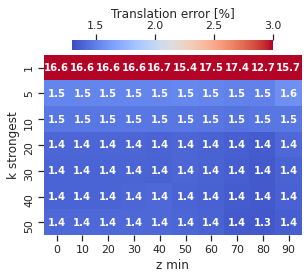

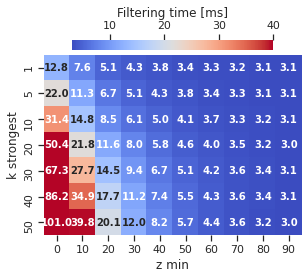

In [2]:
################### K Strongest ########################
df_kstrong = pd.read_csv('./data/kstrong-cfear-3_2022-04-02_0943_eval.csv', sep=r',', header=0)
#df_cfar.rename(columns={"time-Filtering avg": "Filtering time [ms]"})
df_kstrong=df_kstrong.rename({'time-Filtering avg': 'Filtering time [ms]'}, axis=1) 
df_kstrong=df_kstrong[df_kstrong["z min"]<100]
df_kstrong.sort_values(by=["z min", "k strongest"])
result3 = df_kstrong.pivot_table(index="k strongest", 
                        columns="z min", 
                        values='Trans.err.(%)', fill_value= float("NaN"))




plt.figure(3)
sns_plot = sns.heatmap(result3,square=True,vmin=1.3, vmax=3.0, cmap="coolwarm",annot=True, fmt="0.1f",cbar_kws={'label': 'Translation error [%]', "location": "top", "use_gridspec" : False, "pad":pad_distance,"shrink": 0.6},annot_kws=annot_kws, robust=True)
#sns_plot = sns.heatmap(result,vmin=1.3, vmax=3.0, cmap="coolwarm",annot=True, fmt="0.1f",cbar_kws={'label': 'Translation error [%]',"location": "top", "use_gridspec" : False, "pad": pad_distance},annot_kws=annot_kws)
#plt.title('Filter quality evaluated by odometry performance')
fig=sns_plot.get_figure()
fig.savefig('./output/k-strongest_parameter_sensitivity.pdf', format='pdf',bbox_inches='tight')
fig.savefig('./output/k-strongest_parameter_sensitivity.png', format='png', dpi=1000,bbox_inches='tight')


plt.figure(4)

result4 = df_kstrong.pivot_table(index='k strongest', columns='z min', values='Filtering time [ms]')
sns_plot_2 = sns.heatmap(result4,square=True,vmin=3, vmax=40, cmap="coolwarm",annot=True, fmt=".1f",cbar_kws={'label': 'Filtering time [ms]', "location": "top", "use_gridspec" : False, "pad":pad_distance,"shrink": 0.6},annot_kws=annot_kws, robust=True)
#sns_plot_2 = sns.heatmap(filter_tab,vmin=3, vmax=40, cmap="coolwarm",annot=True, fmt=".1f",cbar_kws={'label': 'Filtering time [ms]',"location": "top", "use_gridspec" : False, "pad": pad_distance},annot_kws=annot_kws)
#plt.title('Filtering time due to k-strong and z min')
fig2=sns_plot_2.get_figure()
fig2.savefig('./output/k-strongest_time.pdf', format='pdf',bbox_inches='tight')
fig2.savefig('./output/k-strongest_time.png', format='png', dpi=1000,bbox_inches='tight')